In [18]:
import pandas as pd
import numpy as np
import pickle
import os
import warnings

from src.pdb_to_dfs import process_pdb
from src.ssdna_calc import ssdna_distances, get_ssdna_angles, get_ssdna_dihedrals
from src.utils import nucleotide_names

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")


In [3]:
pdbs_folder = "data/processed_pdbs"
pdb_list = [pdb for pdb in os.listdir(pdbs_folder) if pdb.endswith(".pdb") ]

In [4]:
ps_distances = []
sp_distances = []
sb_distances = []
bb_distances = []
nu_names = []

for pdb in pdb_list:
    try:
        dfs, chain_types = process_pdb(pdb)

    except Exception as e:
        print(f"Error processing {pdb}: {e}")
        continue
    
    for df, chain_type in zip(dfs, chain_types):
        if chain_type == "ssdna":
            ps, sp, sb, bb = ssdna_distances(df)
            ps_distances.extend(ps)
            sp_distances.extend(sp)
            sb_distances.extend(sb)
            bb_distances.extend(bb)
            # Get nu names
            nu_names.extend(df["residue"].values)

            




Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 9995 in chain B has missing atoms.
Nucleotide 9 in chain B has missing atoms.
Nucleotide 6 in chain C has missing atoms.
Nucleotide 15 in chain C has missing atoms.
Nucleotide 17 in chain C has missing atoms.
Nucleotide 18 in chain C has missing atoms.
Nucleotide 20 in chain C has missing atoms.
Nucleotide 25 in chain C has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain F has missing atoms.
Nucleotide 9 in chain G has missing atoms.
Nucleotide 1 in chain L has missing atoms.
Nucleotide 1 in chain H has missing atoms.
Nucleotide 1 in chain I has missing atoms.
Nucleotide 1 in chain C has missing atoms.
Nucleotide 1 in chain D has missing atoms.
Nucleotide 923 in chain C has missing atoms.
Nucleotide 935 in chain D has missing atoms.
Nucleotide 11 in chain D has missing atoms.
Nucleotide 1 in chain B has missing atoms

In [7]:
# Print the shapes 
print(f"ps_distances: {len(ps_distances)}")
print(f"sp_distances: {len(sp_distances)}")
print(f"sb_distances: {len(sb_distances)}")
print(f"bb_distances: {len(bb_distances)}")
print(f"nu_names: {len(nu_names)}")

ps_distances: 946
sp_distances: 838
sb_distances: 946
bb_distances: 838
nu_names: 946


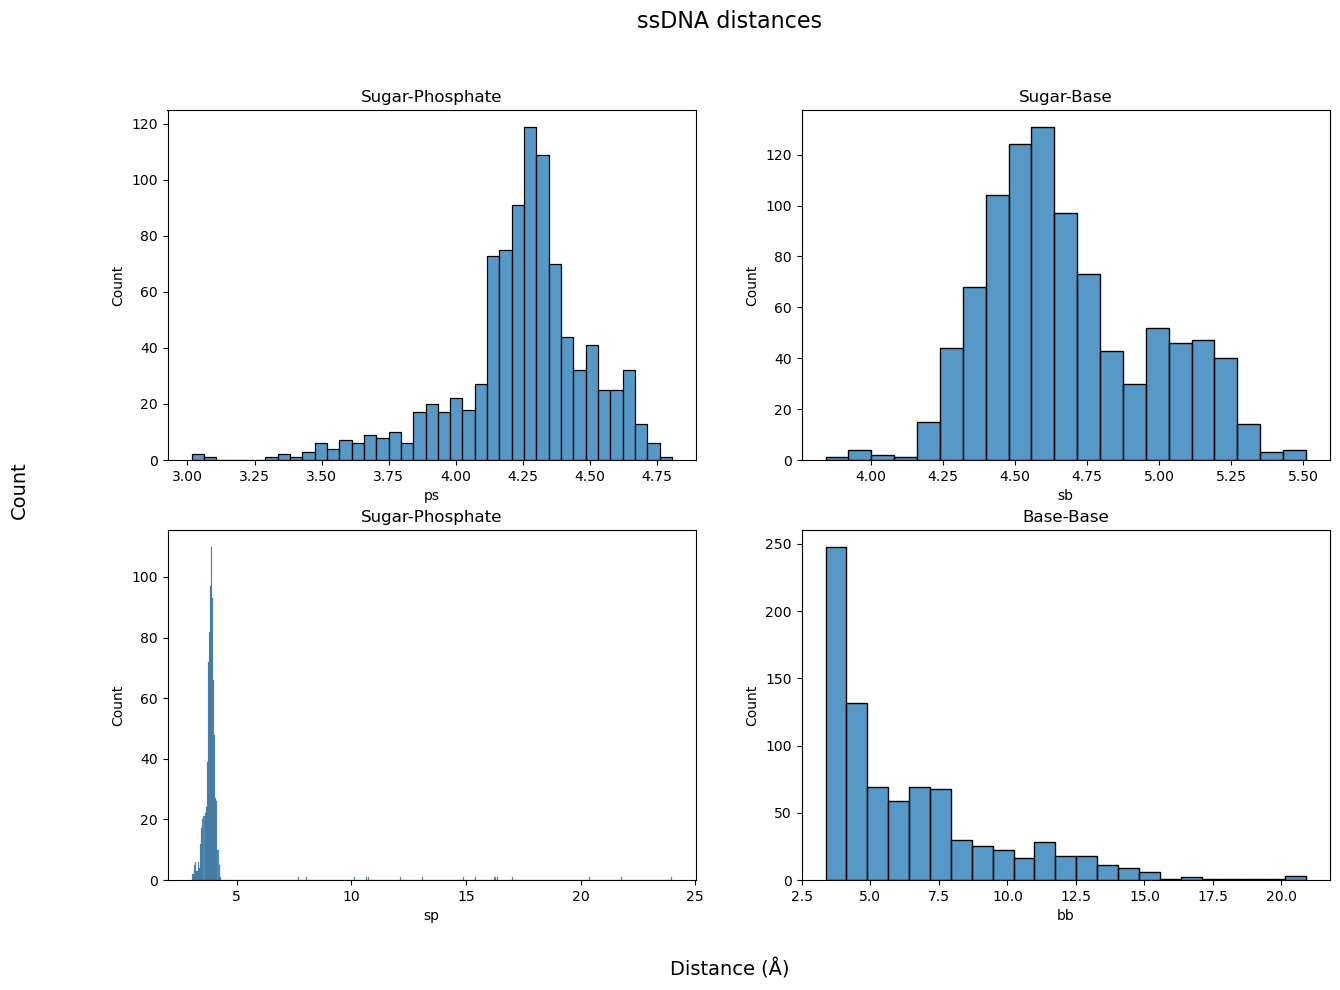

In [19]:
df_ps_sb = pd.DataFrame({"ps": ps_distances, "sb": sb_distances, "nu_name": nu_names})
# Remove the rows where nu_name is not a nucleotide
df_ps_sb = df_ps_sb[df_ps_sb["nu_name"].isin(nucleotide_names)]
df_sp = pd.DataFrame({"sp": sp_distances})
df_bb = pd.DataFrame({"bb": bb_distances})

# Plot the distributions
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("ssDNA distances", fontsize=16)
fig.supxlabel("Distance (Å)", fontsize=14)
fig.supylabel("Count", fontsize=14)
sns.histplot(data=df_ps_sb, x="ps", ax=ax[0, 0])
ax[0, 0].set_title("Sugar-Phosphate")
sns.histplot(data=df_ps_sb, x="sb", ax=ax[0, 1])
ax[0, 1].set_title("Sugar-Base")
sns.histplot(data=df_sp, x="sp", ax=ax[1, 0])
ax[1, 0].set_title("Sugar-Phosphate")
sns.histplot(data=df_bb, x="bb", ax=ax[1, 1])
ax[1, 1].set_title("Base-Base")

plt.show()

In [20]:
df_ps_sb.groupby("nu_name").mean().sort_values("ps", ascending=False)

,ps,sb
nu_name,,
DG,4.254782,5.100429
DT,4.244767,4.553833
DC,4.239239,4.539788
DA,4.235679,4.998542


In [23]:
# Mean of the distances
print(df_sp.mean())
print(df_bb.mean())

sp    4.025917
dtype: float32
bb    6.458953
dtype: float32


In [13]:
print("Phosphate-Sugar Distance Means")
print(ps_distances_nu.groupby("nu").mean())

Phosphate-Sugar Distance Means
    ps_distances
nu              
DA      4.235679
DC      4.239239
DG      4.254782
DT      4.244767


In [12]:
print("Sugar-Base Distance Mean")
sb_distances_nu.groupby("nu").mean()

Sugar-Base Distance Mean


,sb_distances
nu,
DA,4.998542
DC,4.539788
DG,5.100429
DT,4.553833


In [ ]:
sb_distances_nu = sb_distances_nu[sb_distances_nu["sb_distances"] < 5]

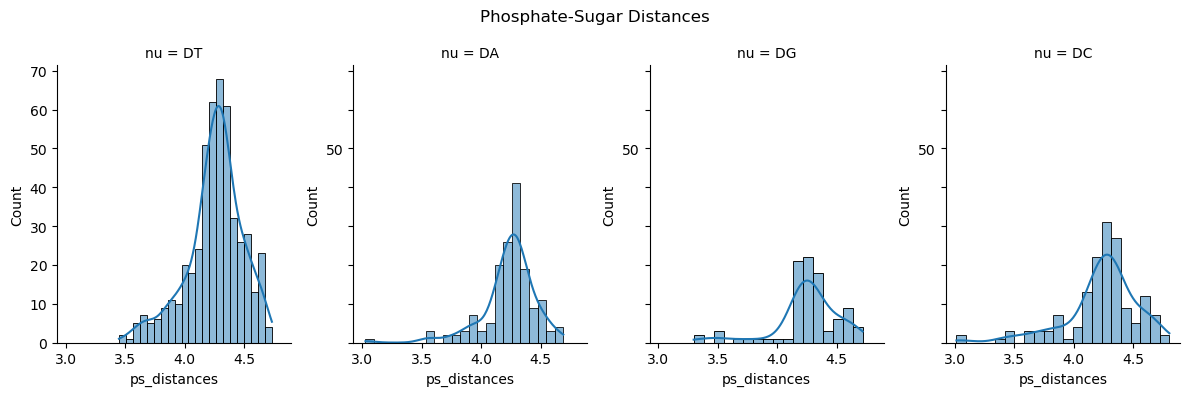

In [45]:
plot = sns.FacetGrid(ps_distances_nu, col="nu", col_wrap=4, height=2, aspect=1)
plot.figure.set_size_inches(12, 4)
plot.figure.suptitle("Phosphate-Sugar Distances")
plot.map(sns.histplot, "ps_distances", stat="count", kde=True)
plt.show()

    

In [51]:
sb_distances_nu.groupby("nu").mean()

,sb_distances
nu,
DA,4.998730
DC,4.538777
DG,5.104461
DT,4.553801


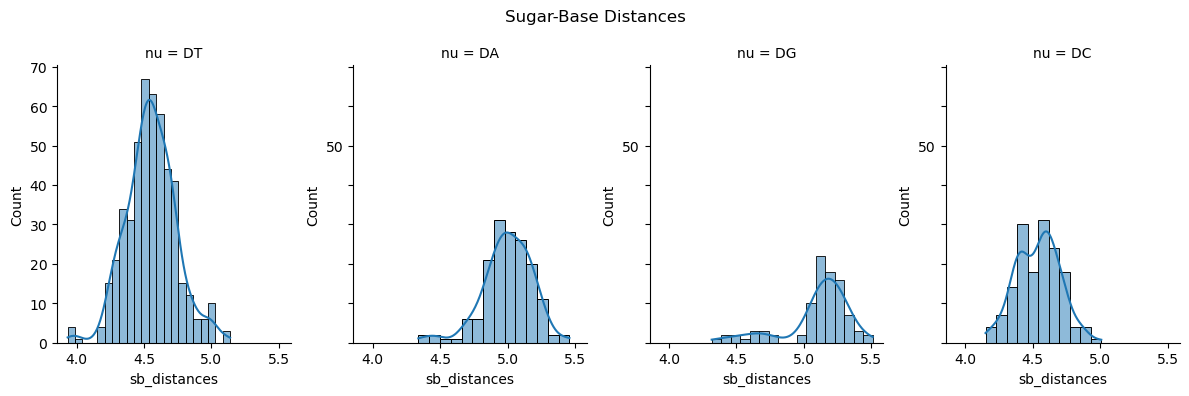

In [46]:
plot = sns.FacetGrid(sb_distances_nu, col="nu", col_wrap=4, height=2, aspect=1)
plot.figure.set_size_inches(12, 4)
plot.figure.suptitle("Sugar-Base Distances")
plot.map(sns.histplot, "sb_distances", stat="count", kde=True)
plt.show()

In [27]:
psb_angles = []
psp_angles = []
bsp_angles = []
sps_angles = []

for pdb in pdb_list:
    try:
        dfs, chain_types = process_pdb(pdb)

    except Exception as e:
        print(f"Error processing {pdb}: {e}")
        continue
    
    for df, chain_type in zip(dfs, chain_types):
        if chain_type == "ssdna":
            psb, psp, bsp, sps = get_ssdna_angles(df)
            psb_angles.extend(psb)
            psp_angles.extend(psp)
            bsp_angles.extend(bsp)
            sps_angles.extend(sps)

# Convert to dataframes
psb_angles = pd.DataFrame({"psb_angles": psb_angles, "nu_name": nu_names})
psp_angles = pd.DataFrame(psp_angles, columns=["psp_angles"])
bsp_angles = pd.DataFrame(bsp_angles, columns=["bsp_angles"])
sps_angles = pd.DataFrame(sps_angles, columns=["sps_angles"])



Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 9995 in chain B has missing atoms.
Nucleotide 9 in chain B has missing atoms.
Nucleotide 6 in chain C has missing atoms.
Nucleotide 15 in chain C has missing atoms.
Nucleotide 17 in chain C has missing atoms.
Nucleotide 18 in chain C has missing atoms.
Nucleotide 20 in chain C has missing atoms.
Nucleotide 25 in chain C has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain F has missing atoms.
Nucleotide 9 in chain G has missing atoms.
Nucleotide 1 in chain L has missing atoms.
Nucleotide 1 in chain H has missing atoms.
Nucleotide 1 in chain I has missing atoms.
Nucleotide 1 in chain C has missing atoms.
Nucleotide 1 in chain D has missing atoms.
Nucleotide 923 in chain C has missing atoms.
Nucleotide 935 in chain D has missing atoms.
Nucleotide 11 in chain D has missing atoms.
Nucleotide 1 in chain B has missing atoms

In [26]:
# Print the shapes
print(f"psb_angles: {len(psb_angles)}")
print(f"psp_angles: {len(psp_angles)}")
print(f"bsp_angles: {len(bsp_angles)}")
print(f"sps_angles: {len(sps_angles)}")


psb_angles: 946
psp_angles: 838
bsp_angles: 838
sps_angles: 838


In [29]:
psb_angles = psb_angles[psb_angles["nu_name"].isin(nucleotide_names)]
psb_angles.groupby("nu_name").mean().sort_values("psb_angles", ascending=False)

,psb_angles
nu_name,
DG,106.777244
DC,102.275600
DA,101.053617
DT,99.845212


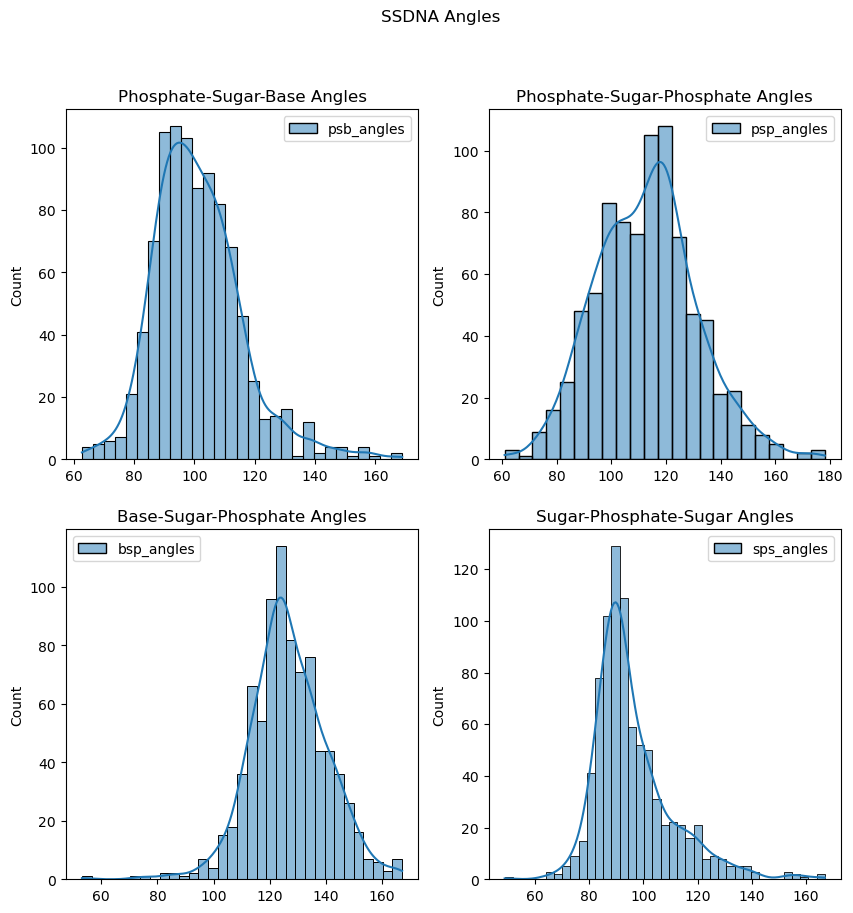

In [30]:
# Plot the distributions
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("SSDNA Angles")

sns.histplot(psb_angles, ax=ax[0, 0], stat= "count", kde=True)
ax[0, 0].set_title("Phosphate-Sugar-Base Angles")
sns.histplot(psp_angles, ax=ax[0, 1], stat= "count", kde=True)
ax[0, 1].set_title("Phosphate-Sugar-Phosphate Angles")
sns.histplot(bsp_angles, ax=ax[1, 0], stat= "count", kde=True)
ax[1, 0].set_title("Base-Sugar-Phosphate Angles")
sns.histplot(sps_angles, ax=ax[1, 1], stat= "count", kde=True)
ax[1, 1].set_title("Sugar-Phosphate-Sugar Angles")
plt.show()


In [32]:
# Print the means
print("Phosphate-Sugar-Base Angles")
print(psb_angles.groupby("nu_name").mean().sort_values("psb_angles", ascending=False))
print("Phosphate-Sugar-Phosphate Angles")
print(psp_angles.mean().values[0])
print("Base-Sugar-Phosphate Angles")
print(bsp_angles.mean().values[0])
print("Sugar-Phosphate-Sugar Angles")
print(sps_angles.mean().values[0])

Phosphate-Sugar-Base Angles
         psb_angles
nu_name            
DG       106.777244
DC       102.275600
DA       101.053617
DT        99.845212
Phosphate-Sugar-Phosphate Angles
112.95691706384316
Base-Sugar-Phosphate Angles
126.79953213638493
Sugar-Phosphate-Sugar Angles
96.0112424447019


In [34]:
psps_dihedrals = []
spsp_dihedrals = []

for pdb in pdb_list:
    try:
        dfs, chain_types = process_pdb(pdb)

    except Exception as e:
        print(f"Error processing {pdb}: {e}")
        continue
    
    for df, chain_type in zip(dfs, chain_types):
        if chain_type == "ssdna":
            psps, spsp = get_ssdna_dihedrals(df)
            psps_dihedrals.extend(psps)
            spsp_dihedrals.extend(spsp)


# Convert to dataframes
psps_dihedrals = pd.DataFrame(psps_dihedrals, columns=["psps_dihedrals"])
spsp_dihedrals = pd.DataFrame(spsp_dihedrals, columns=["spsp_dihedrals"])

# Remove the invalid values outside of the range -180 to 180
# df_sbbs[(df_sbbs["dihedral"] > -180) & (df_sbbs["dihedral"] < 180)]
psps_dihedrals = psps_dihedrals[(psps_dihedrals["psps_dihedrals"] > -180) & (psps_dihedrals["psps_dihedrals"] < 180)]
spsp_dihedrals = spsp_dihedrals[(spsp_dihedrals["spsp_dihedrals"] > -180) & (spsp_dihedrals["spsp_dihedrals"] < 180)]




Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 9995 in chain B has missing atoms.
Nucleotide 9 in chain B has missing atoms.
Nucleotide 6 in chain C has missing atoms.
Nucleotide 15 in chain C has missing atoms.
Nucleotide 17 in chain C has missing atoms.
Nucleotide 18 in chain C has missing atoms.
Nucleotide 20 in chain C has missing atoms.
Nucleotide 25 in chain C has missing atoms.
Nucleotide 1 in chain B has missing atoms.
Nucleotide 1 in chain F has missing atoms.
Nucleotide 9 in chain G has missing atoms.
Nucleotide 1 in chain L has missing atoms.
Nucleotide 1 in chain H has missing atoms.
Nucleotide 1 in chain I has missing atoms.
Nucleotide 1 in chain C has missing atoms.
Nucleotide 1 in chain D has missing atoms.
Nucleotide 923 in chain C has missing atoms.
Nucleotide 935 in chain D has missing atoms.
Nucleotide 11 in chain D has missing atoms.
Nucleotide 1 in chain B has missing atoms

In [35]:
# Print the shapes
print(f"psps_dihedrals: {len(psps_dihedrals)}")
print(f"spsp_dihedrals: {len(spsp_dihedrals)}")

# print the means
print("Phosphate-Sugar-Phosphate-Sugar Dihedrals")
print(psps_dihedrals.mean().values[0])
print("Sugar-Phosphate-Sugar-Phosphate Dihedrals")
print(spsp_dihedrals.mean().values[0])

psps_dihedrals: 838
spsp_dihedrals: 733
Phosphate-Sugar-Phosphate-Sugar Dihedrals
-67.19807
Sugar-Phosphate-Sugar-Phosphate Dihedrals
-77.33105


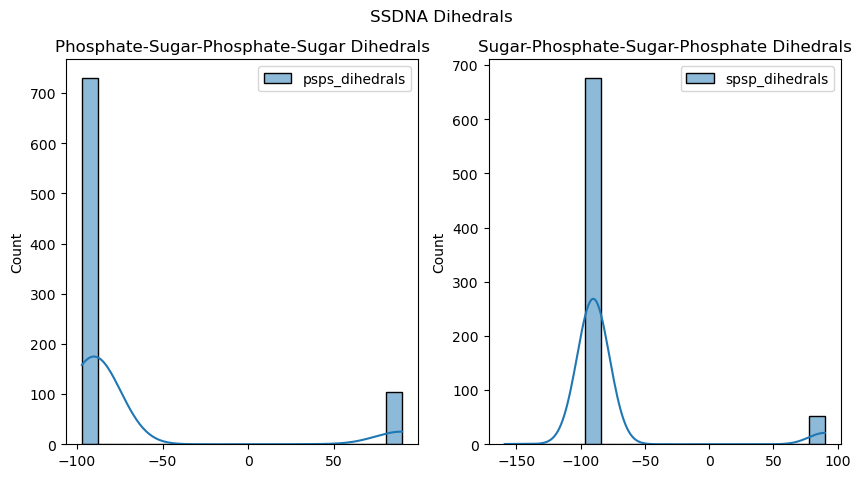

In [36]:
# Plot the distributions
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("SSDNA Dihedrals")

sns.histplot(psps_dihedrals, ax=ax[0], stat= "count", kde=True, bins =20)
ax[0].set_title("Phosphate-Sugar-Phosphate-Sugar Dihedrals")
sns.histplot(spsp_dihedrals, ax=ax[1], stat= "count", kde=True, bins =20)
ax[1].set_title("Sugar-Phosphate-Sugar-Phosphate Dihedrals")
plt.show()